In this notebook, we will work on the project that is based on understanding what factors contributed most to employee turnover and to create a model that can predict if a certain employee will leave the company or not.

Any companies want to improve and maintain a healthy relationship and environment for their employees. This can be achieved by recognizing and understanding the important factors that are associated with employee turnover and taking care of them might add into the productivity and growth of the employees. These insights can help managers for grabing the opportunity to take corrective steps to build and preserve their successful bussiness.

## Exploratory Data Analysis and Wrangling.

### Loading Packages

In [1]:
#Write code here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set()

### Loading Data & Basic Analysis
#### Task 1:Load the data and after making a copy of it, find shape, data types, basic statistics, and null values from the data set

In [3]:
# Load the data
data= pd.read_csv('HR_comma_sep.csv')
df= data.copy()

In [4]:
# Find the shape
df.shape

(14999, 10)

In [5]:
# Display the top 5 rows.
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [6]:
# Find the data types of columns
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
dept                      object
salary                    object
dtype: object

In [7]:
# Find the basic statistics
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [8]:
# Find the null values
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
dept                     0
salary                   0
dtype: int64

### Exploration
#### Find out the how many employees left the company?

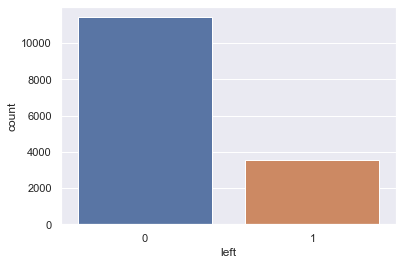

In [9]:
# Count of how many employees left the company
sns.countplot(x='left', data=df);

#### Find out the number of projects being handled.

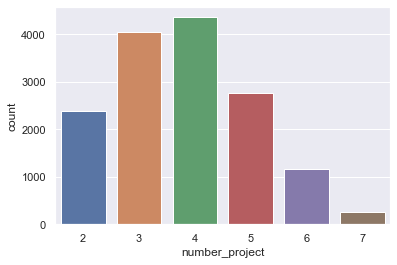

In [11]:
sns.countplot(x='number_project', data=df);

#### number of projects contribute to employee turn-over.
final results show the of employees leaving the company against each number of projects .

In [12]:
df_proj=df.groupby('number_project')['left'].value_counts(normalize=True).reset_index(name='perc')
df_proj['perc']=df_proj['perc']*100

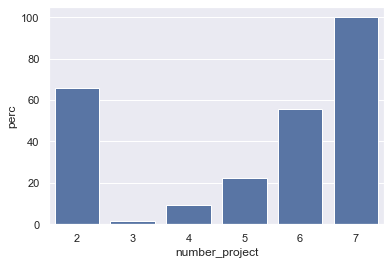

In [13]:
sns.barplot(x='number_project', y='perc', data=df_proj[df_proj['left']==1], color='b')

#### Time spent at the company
Find out how time spend at company can lead to employee turn over. 
##### Showing the following plots.
->Count of Number of years spent by employees.
->After how many years are mostly employees leaving the company?

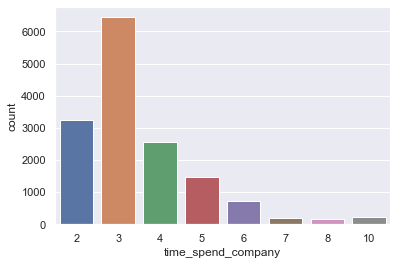

In [14]:
# Show the plot for the count of years here
sns.countplot(x='time_spend_company', data=df);

### Salary trends
What are the salary trends in the data? Use graphical representation for explanation

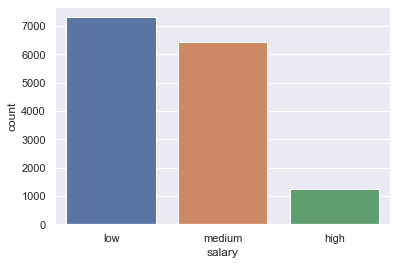

In [15]:
#Write code here
sns.countplot(x='salary', data=df);

### Employees per Department
Find out employees per department and also see which which department has highest number of employees leaving the company.

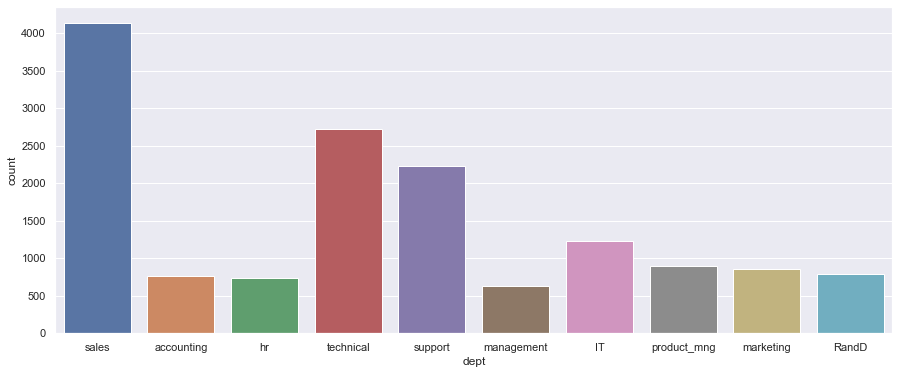

In [17]:
plt.subplots(figsize=(15,6))
sns.countplot(x='dept', data=df);

#### department has highest percentage of turn-over

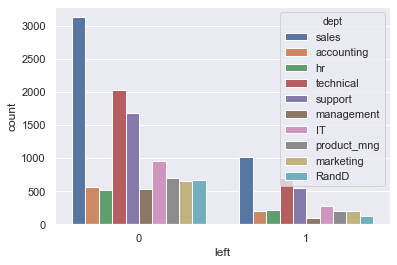

In [18]:
sns.countplot(x='left', hue='dept', data=df)

### Machine Learning


In [20]:
df_OneHot=pd.get_dummies(df,columns=['dept','salary'])
df_OneHot.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept_IT,dept_RandD,...,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [21]:
df=df_OneHot.copy()

#### Creating Independent and Dependent variables

In [22]:
X = df.drop(['left'], axis=1)
Y = df[['left']]
print(X.shape)
print(Y.shape)

(14999, 20)
(14999, 1)


#### Perform Train Test Split with test size 30 percent and random state = 100

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
xtrain, xtest, ytrain, ytest= train_test_split(X,Y, test_size=0.30, random_state=100, shuffle=True)
print(xtrain.shape, ytrain.shape)
print(xtest.shape,ytest.shape)

(10499, 20) (10499, 1)
(4500, 20) (4500, 1)


#### Get the predictions using the following models.

#### Random Forest
#### Logistic Regression
Also get the following scores for each of the above models

###### Accuracy
###### Precision
###### Recall
###### F1-Score
###### Classification Report

### Random forest

In [25]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept_IT,dept_RandD,...,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [26]:
# Importing the model from sklearn
from sklearn.ensemble import RandomForestClassifier

In [27]:
# Making instance and training the model
clf_rf = RandomForestClassifier(random_state=100)
clf_rf.fit(xtrain, ytrain)

C:\Users\SAI NITHIN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\SAI NITHIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

In [28]:
# Get predictions
rf_pred = clf_rf.predict(xtest)
rf_pred_prb=clf_rf.predict_proba(xtest)[:,1]

#### Precision

In [29]:
# Write the code to import the function for calculation of the specific score
from sklearn.metrics import precision_score

In [30]:
#Write the code to calculate
rf_precion= precision_score(ytest,rf_pred)
print("Precision: {}".format(rf_precion))

Precision: 0.9915413533834586


#### Accuracy

In [31]:
# Write the code to import the function for calculation of the specific score
from sklearn.metrics import accuracy_score

In [32]:
# Write the code to calculate
rf_acc= accuracy_score(ytest, rf_pred)
print("Accuracy: {}".format(rf_acc))

Accuracy: 0.9882222222222222


#### Recall

In [33]:
# Write the code to import the function for calculation of the specific score
from sklearn.metrics import recall_score

In [34]:
# Write the code to calculate
rf_recall= recall_score(ytest, rf_pred)
print("Recall: {}".format(rf_recall))

Recall: 0.9599636032757052


#### F1 score

In [35]:
# Write the code to import the function for calculation of the specific score
from sklearn.metrics import f1_score

In [37]:
# Write the code to calculate
rf_f1_score= f1_score(ytest,rf_pred)
print("F1 Score: {}".format(rf_f1_score))

F1 Score: 0.9754969949144706


### Classification Report

In [38]:
# Write the code to import the function for calculation of the specific score
from sklearn.metrics import classification_report

In [39]:
#Write the code to calculate
print(classification_report(ytest,rf_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3401
           1       0.99      0.96      0.98      1099

    accuracy                           0.99      4500
   macro avg       0.99      0.98      0.98      4500
weighted avg       0.99      0.99      0.99      4500



### Linear Regression

In [40]:
# Import the model
from sklearn.linear_model import LogisticRegression

In [41]:
# Create instance and train, random _state=100
lr_pred = LogisticRegression(random_state=100)

In [42]:
# get the predictions
lr_pred.fit(xtrain, ytrain)

C:\Users\SAI NITHIN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\SAI NITHIN\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=100, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
pred = lr_pred.predict(xtest)

#### Accuracy

In [44]:
#Write the code here
lr_accuracy= accuracy_score(ytest, pred)
print("Accuracy: {}".format(lr_accuracy))

Accuracy: 0.7862222222222223


#### Precision 

In [45]:
#Write the code here
lr_precision= precision_score(ytest,pred)
print("Precision: {}".format(lr_precision))

Precision: 0.6121112929623568


#### F1 score

In [46]:
#Write the code here
lr_f1_score= f1_score(ytest,pred)
print("F1 Score by built-in function: {}".format(lr_f1_score))

F1 Score by built-in function: 0.43742690058479533


#### Recall

In [47]:
#Write the code here
lr_recall= recall_score(ytest,pred)
print("Recall by built-in function: {}".format(lr_recall))

Recall by built-in function: 0.3403093721565059


#### Classification

In [49]:
#Write the code here
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87      3401
           1       0.61      0.34      0.44      1099

    accuracy                           0.79      4500
   macro avg       0.71      0.64      0.65      4500
weighted avg       0.76      0.79      0.76      4500



### Result Comparisons
the comparison of the above used models as per the scores found.Lets make a datafram that shows the models and scores for each models.

In [52]:
comparison_dict={"Algorithm":["Random Forest","Logistic Regression"],
                 "Accuracy":[rf_acc,lr_accuracy],
                 "Precision":[rf_precion,lr_precision],
                 "Recall":[rf_recall,lr_recall],
                 "F1 Score":[rf_f1_score,lr_f1_score]
                }

In [53]:
comparison=pd.DataFrame(comparison_dict)
comparison.sort_values(['Recall','Accuracy'], ascending=False)

,Algorithm,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.988222,0.991541,0.959964,0.975497
1,Logistic Regression,0.786222,0.612111,0.340309,0.437427


In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
clf_dt = RandomForestClassifier(max_depth=25,criterion='gini',random_state=100)

In [56]:
clf_dt.fit(xtrain, ytrain)

C:\Users\SAI NITHIN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\SAI NITHIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=25, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

In [57]:
clf_dt.feature_importances_

array([0.32184885, 0.13348388, 0.16917307, 0.15099213, 0.17955833,
       0.00883324, 0.00105009, 0.00150067, 0.00140884, 0.00185761,
       0.00179457, 0.00150978, 0.00063571, 0.00083317, 0.00339207,
       0.0032173 , 0.00413768, 0.00683614, 0.00360312, 0.00433373])

In [59]:
features_tuple=list(zip(X.columns,clf_dt.feature_importances_))

In [60]:
features_tuple

[('satisfaction_level', 0.3218488469271479),
 ('last_evaluation', 0.13348388115822557),
 ('number_project', 0.16917307209770163),
 ('average_montly_hours', 0.15099213129531264),
 ('time_spend_company', 0.17955832589175236),
 ('Work_accident', 0.008833244955649439),
 ('promotion_last_5years', 0.0010500865956215198),
 ('dept_IT', 0.0015006726860119454),
 ('dept_RandD', 0.0014088446785450186),
 ('dept_accounting', 0.0018576119040881176),
 ('dept_hr', 0.0017945663770806137),
 ('dept_management', 0.0015097844509879108),
 ('dept_marketing', 0.0006357107917269492),
 ('dept_product_mng', 0.0008331705988215623),
 ('dept_sales', 0.0033920722323260016),
 ('dept_support', 0.0032173041437974026),
 ('dept_technical', 0.004137679275165269),
 ('salary_high', 0.006836144118004145),
 ('salary_low', 0.003603120031075973),
 ('salary_medium', 0.0043337297909580115)]

In [61]:
feature_imp=pd.DataFrame(features_tuple,columns=["Feature Names","Importance"])

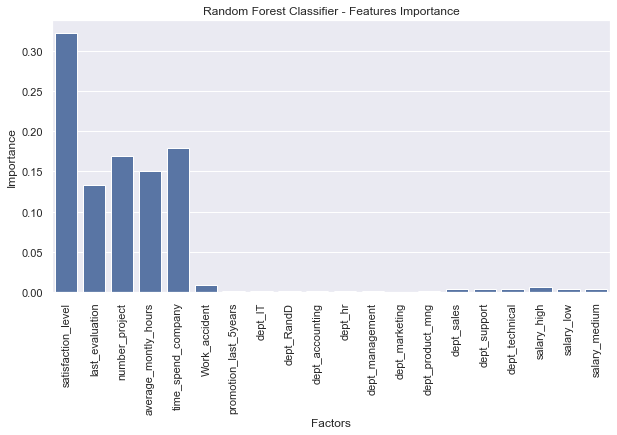

In [62]:
plt.figure(figsize=(10,5))
sns.barplot(x="Feature Names",y="Importance", data=feature_imp, color='b')
plt.xlabel("Factors")
plt.ylabel("Importance")
plt.xticks(rotation=90)
plt.title("Random Forest Classifier - Features Importance")
plt.savefig('FeatureImportance.png')